<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [11]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from matplotlib.lines import Line2D
import itertools as itr

In [13]:
import src
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from src.enm import *
from src.utils import *
from Bio import SeqIO


figure_path = '../reports/figures/yuri_0519'
yuri = Enm('yuri')
yuri.read_network('../data/interim/yuri/yuri_combined.csv')
yuri.gnm_analysis()

yuri.figure_path=figure_path
#yuri.output_path = 'data/interim/yuri/'
#yuri.plot_collectivity()

#yuri.plot_network_spring()
#yuri.plot_vector(sorted=True)
#yuri.plot_scatter(x='deg',y='eff',figure_name='deg_eff')
#yuri.plot_scatter(x='deg',y='sens',figure_name='deg_sens')

#yuri.simulate_rewire(output_name='rewire_data',save=True)
#yuri.rewire_df
#yuri.plot_correlation_density(x='eff',y='deg')
#yuri.plot_correlation_density(x='sens',y='deg',correlation='spearman')
#nx.set_node_attributes(yuri.graph_gc,dict(zip(list(yuri.graph_gc.nodes),list(yuri.graph_gc.nodes))),'orf_name')

#go_df = pd.read_csv('data/interim/go_results/4.tsv','\t')

#yuri.plot_network_spring(plot_go=True,go_df_list=[go_df],level_list=[0.2])


@> 2067 modes were calculated in 4.60s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.8s.
@> Perturbation response scanning completed in 7.8s.


In [16]:
yuri.spring_pos()
df_ = yuri.df

In [62]:
sensors = df_.loc[df_['sens']>np.quantile(df_['sens'],0.99)]

In [ ]:
go_df_sensor=pd.read_csv('results/huri_100/enrichment.csv')
go_df_sensor.iloc[0,:].Genes.split(' ')

In [18]:
Gc = yuri.graph_gc

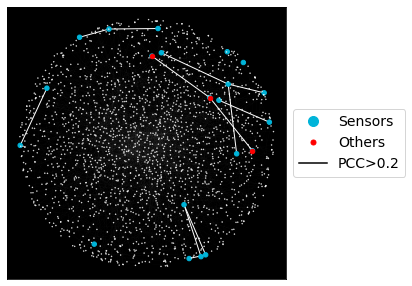

In [72]:
sensor_sub = nx.induced_subgraph(Gc,sensors.orf_name.values)
spring_pos = Gc.nodes(data='pos')

legend_elements = [Line2D([0], [0], marker='o', color='#00b4d9', label='Sensors',
                          markerfacecolor='#00b4d9', markersize=10,linestyle="None"),
                   Line2D([0], [0], marker='o', color='red', label='Others',
                          markerfacecolor='red', markersize=5,linestyle="None"),
    Line2D([0], [0], marker='o', color='black', label='PCC>0.2',
                          markerfacecolor='black', markersize=0,linestyle="-")
                   ]
#for i in tqdm(range(2)):
i=3
fig, ax = plt.subplots(figsize=(5,5))
sensor_size = 20
#hng = get_hinges(df_,i,combined_df,remove_degree_one=False)
nx.draw_networkx_nodes(Gc, node_color=['#00b4d9' if x in sensors.iloc[:,0].tolist() else (1,1,1,0.05) for x in Gc.nodes],
            node_size =[sensor_size if x in sensors.iloc[:,0].tolist() else 0.2 for x in Gc.nodes],
                        #alpha=0.1,
                        #node_size=0.2,
                        #alpha=0.5,
                        #node_color='white',
                        pos=spring_pos,
                        label='Sensors'
                       #node_shape=matplotlib.markers.MarkerStyle(marker='o',fillstyle='full')
                        )
nx.draw_networkx_nodes(nx.induced_subgraph(Gc,[geneid2name[x] for x in goea_results_sig[2].study_items]),
                      node_color='red',
                       node_size=sensor_size,
                      pos=spring_pos)

# nx.draw_networkx_nodes(nx.induced_subgraph(Gc,[key for key,d in Gc.nodes(data='orf_name') if d in ['YBR186W', 'YHR046C', 'YIL132C', 'YMR058W', 'YNL204C']]),
#                       node_color='orange',
#                        node_size=sensor_size,
#                       pos=spring_pos)

ax.set_facecolor("#000000")
#hng = get_hinges(df_,i,combined_df,remove_degree_one=False)
nx.draw_networkx_edges(Gc,
        alpha=[],#[0.05],
        pos=spring_pos,
        width=[1 if x in [s for s in itr.combinations(sensors.iloc[:,0].tolist(),2)] else 0.2 for x in Gc.edges],
        edge_color = [(1,1,1,1) if x in [s for s in itr.combinations(sensors.iloc[:,0].tolist(),2)] else (1,1,1,0.05) for x in Gc.edges],
        label='PCC>0.2')
#plot_go_contours(Gc,ax,go_df_list[i],1,clabels=True,level=0.01)
plt.legend(handles=legend_elements,fontsize=14,loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.title(f'Costanzo 2016 profile similarity network',fontsize=20)
#plt.legend(legend_elements,['Sensors', 'Others', 'PCC>0.2'])
plt.savefig(f'../reports/figures/yuri_0519/sensor_networkmap_dark_gocolored.pdf')
# plt.close()

In [30]:
sensors.shape

(104, 17)

In [35]:
from src.utils import create_goea
from goatools.obo_parser import GODag
from goatools.anno.genetogo_reader import Gene2GoReader
from goatools.anno.gaf_reader import GafReader
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS
from tqdm import tqdm

goeaobj, geneid2name = create_goea()

../data/raw/ontology/go-basic.obo: fmt(1.2) rel(2019-06-01) 47,444 GO Terms
HMS:0:00:02.585025 119,640 annotations READ: ../data/raw/ontology/sgd.gaf 

Load BP Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 83%  4,811 of  5,813 population items found in association

Load CC Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 88%  5,097 of  5,813 population items found in association

Load MF Gene Ontology Analysis ...
fisher module not installed.  Falling back on scipy.stats.fisher_exact
 72%  4,168 of  5,813 population items found in association


In [33]:
strain_ids = pd.read_csv('../data/interim/strain_ids_with_experiment_count_all.csv')
combined_df = pd.merge(yuri.df, strain_ids, left_on='orf_name',right_on='Allele Gene name')
combined_df['group']=np.where(combined_df.cat.isna(),'essential','nonessential')

In [63]:
query = sensors.orf_name.values#combined_df.iloc[np.argsort(np.abs(eig_vec)),:].loc[:,'Systematic gene name'].values[:100]#combined_df.sample(100).loc[:,'Systematic gene name'].values#

#print(geneid2name)
query_gene_ids = [key for key,value in geneid2name.items() if value in query]#sgd_info[sgd_info.iloc[:,3].isin(query)].iloc[:,0].values.tolist()

goea_results_all = goeaobj.run_study(query_gene_ids, prt=None)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]

In [64]:
[i.name for i in goea_results_sig]

['trehalose metabolism in response to stress',
 'trehalose biosynthetic process',
 'alpha,alpha-trehalose-phosphate synthase complex (UDP-forming)',
 'alpha,alpha-trehalose-phosphate synthase (UDP-forming) activity',
 'trehalose-phosphatase activity',
 'protein phosphatase regulator activity']

['YML100W', 'YMR261C', 'YBR126C']